In [1]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read in the VIC dataset from a CSV file
df=pd.read_csv("E:\HoaPhatdataset.csv")

In [7]:
df

,date,price,Open,High,Low,Vol.,Change %
2015-09-07,2015-09-07,3861.9,3888.4,3941.3,3848.7,6.33M,-1.69%
2015-09-08,2015-09-08,3994.2,3875.2,3994.2,3861.9,5.76M,3.43%
2015-09-09,2015-09-09,4060.3,4047.1,4073.5,4007.4,10.08M,1.65%
2015-09-10,2015-09-10,4020.6,4007.4,4060.3,3967.7,4.93M,-0.98%
2015-09-11,2015-09-11,3928.1,4007.4,4020.6,3928.1,6.22M,-2.30%
...,...,...,...,...,...,...,...
2022-11-24,2022-11-24,14350.0,13700.0,14400.0,13600.0,31.12M,3.99%
2022-11-25,2022-11-25,15300.0,14600.0,15300.0,14350.0,26.53M,6.62%
2022-11-28,2022-11-28,16350.0,15600.0,16350.0,15600.0,58.84M,6.86%
2022-11-29,2022-11-29,17400.0,16600.0,17450.0,16350.0,64.31M,6.42%


In [3]:
# Convert the 'date' column to a datetime data type
df['date']=pd.to_datetime(df.date,format='%m/%d/%Y')

In [4]:
#set the date as the index
df=df.set_index(pd.DatetimeIndex(df['date'].values))

In [5]:
# Create a new DataFrame containing only the 'date' and 'price' columns
df1 = pd.DataFrame(df, columns=['date', 'price'])

# Set the index of the DataFrame to the 'date' column
df1.index = df1.date

# Drop the 'date' column from the DataFrame
df1.drop('date', axis=1, inplace=True)

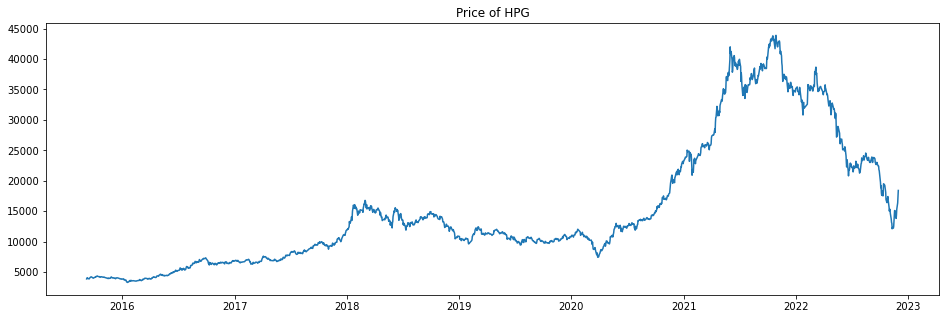

In [6]:
# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df['price'])
plt.title('Price of HPG')
plt.show()

In [8]:
# Convert the 'df1' DataFrame to a NumPy array
data = df1.values

# Scale the data using a MinMaxScaler

# Create a MinMaxScaler object with a specified range
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

In [9]:
# Create training datasets for the model
x, y = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(data)):
    # Append the last 5 values to the x_train array
    x.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y.append(sc_train[i, 0])

In [10]:
x

[array([0.01432694, 0.01758429, 0.01921174, 0.01823428, 0.01595684]),
 array([0.01758429, 0.01921174, 0.01823428, 0.01595684, 0.0146544 ]),
 array([0.01921174, 0.01823428, 0.01595684, 0.0146544 , 0.01432694]),
 array([0.01823428, 0.01595684, 0.0146544 , 0.01432694, 0.01595684]),
 array([0.01595684, 0.0146544 , 0.01432694, 0.01595684, 0.01693183]),
 array([0.0146544 , 0.01432694, 0.01595684, 0.01693183, 0.01953673]),
 array([0.01432694, 0.01595684, 0.01693183, 0.01953673, 0.02246909]),
 array([0.01595684, 0.01693183, 0.01953673, 0.02246909, 0.02279409]),
 array([0.01693183, 0.01953673, 0.02246909, 0.02279409, 0.02214163]),
 array([0.01953673, 0.02246909, 0.02279409, 0.02214163, 0.02149164]),
 array([0.02246909, 0.02279409, 0.02214163, 0.02149164, 0.02051418]),
 array([0.02279409, 0.02214163, 0.02149164, 0.02051418, 0.01758429]),
 array([0.02214163, 0.02149164, 0.02051418, 0.01758429, 0.01725929]),
 array([0.02149164, 0.02051418, 0.01758429, 0.01725929, 0.01823428]),
 array([0.02051418, 

In [11]:
y

[0.014654395580045193,
 0.014326936807843249,
 0.01595684438075823,
 0.016931834409269292,
 0.01953673201069535,
 0.02246908838432335,
 0.0227940850604937,
 0.02214162961212139,
 0.021491636259780664,
 0.020514184135238006,
 0.0175842898576416,
 0.01725929318147125,
 0.018234283209982313,
 0.019211735334524985,
 0.019864190782897292,
 0.021491636259780664,
 0.023444078412834413,
 0.02181663293595104,
 0.02409653386120672,
 0.024748989309579028,
 0.026051438110292063,
 0.024748989309579028,
 0.02442153053737707,
 0.02442153053737707,
 0.023444078412834413,
 0.023444078412834413,
 0.021491636259780664,
 0.020839180811408356,
 0.021491636259780664,
 0.0227940850604937,
 0.02311908173666405,
 0.02246908838432335,
 0.021491636259780664,
 0.02181663293595104,
 0.02181663293595104,
 0.020839180811408356,
 0.02181663293595104,
 0.020514184135238006,
 0.020189187459067656,
 0.020189187459067656,
 0.019211735334524985,
 0.01856174198218427,
 0.017909286533811963,
 0.01725929318147125,
 0.0172592

In [12]:
# Convert the x and y arrays to NumPy arrays
x = np.array(x)
y = np.array(y)

# Reshape the x_train and y_train arrays to be one-dimensional
x = np.reshape(x, (x.shape[0], x.shape[1], 1))
y = np.reshape(y, (y.shape[0], 1))

In [13]:
# Build the model
model = Sequential()

# Add an LSTM layer with 128 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(units=64, input_shape=(x.shape[1], 1), return_sequences=True,kernel_regularizer=l2(0.01)))

# Add an LSTM layer with 64 units
model.add(LSTM(units=64, return_sequences=True))

# Add an LSTM layer with 64 units
model.add(LSTM(units=64, return_sequences=False))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(0.5))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model.hdf5'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x, y, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.13963, saving model to save_model_8-2.hdf5
37/37 - 9s - loss: 0.1396 - 9s/epoch - 254ms/step
Epoch 2/80

Epoch 2: loss improved from 0.13963 to 0.05576, saving model to save_model_8-2.hdf5
37/37 - 0s - loss: 0.0558 - 370ms/epoch - 10ms/step
Epoch 3/80

Epoch 3: loss improved from 0.05576 to 0.04558, saving model to save_model_8-2.hdf5
37/37 - 0s - loss: 0.0456 - 440ms/epoch - 12ms/step
Epoch 4/80

Epoch 4: loss improved from 0.04558 to 0.03998, saving model to save_model_8-2.hdf5
37/37 - 0s - loss: 0.0400 - 469ms/epoch - 13ms/step
Epoch 5/80

Epoch 5: loss improved from 0.03998 to 0.03745, saving model to save_model_8-2.hdf5
37/37 - 0s - loss: 0.0375 - 453ms/epoch - 12ms/step
Epoch 6/80

Epoch 6: loss improved from 0.03745 to 0.03643, saving model to save_model_8-2.hdf5
37/37 - 0s - loss: 0.0364 - 500ms/epoch - 14ms/step
Epoch 7/80

Epoch 7: loss improved from 0.03643 to 0.03617, saving model to save_model_8-2.hdf5
37/37 - 0s - loss: 0.0

In [14]:
# Print the scaled test data
print(sc_train)

[[0.01432694]
 [0.01758429]
 [0.01921174]
 ...
 [0.32179595]
 [0.34764796]
 [0.37226892]]


In [15]:
sc_train.shape

(1812, 1)

In [16]:
# Create an input array using the last 5 days of the scaled test data
x_input = sc_train[1807:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

(1, 5)


In [17]:
# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

[0.2725540306974133, 0.29594394299755267, 0.3217959513292856, 0.3476479596610186, 0.37226891997695477]


In [18]:
# demonstrate prediction for next 30 days

# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 31):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps,1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.3234555125236511], [0.3446640372276306], [0.3602136969566345], [0.36893683671951294], [0.3706921637058258], [0.36553627252578735], [0.3787843585014343], [0.38686275482177734], [0.39153414964675903], [0.3950733542442322], [0.3998558521270752], [0.4083709716796875], [0.41439008712768555], [0.41962945461273193], [0.42526715993881226], [0.43173158168792725], [0.4386507272720337], [0.44476738572120667], [0.45094019174575806], [0.4574667811393738], [0.4642467498779297], [0.47102850675582886], [0.47767847776412964], [0.4844954013824463], [0.4914921522140503], [0.4985787868499756], [0.5056971311569214], [0.5128742456436157], [0.5201846957206726], [0.5276028513908386], [0.5350977182388306]]


In [22]:
import datetime as dt

# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 30 days
datelist_future = pd.date_range(datelist_train[-1], periods=31, freq='1d').tolist()

In [23]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[16417.40440556]
 [17278.80560323]
 [17910.36747285]
 [18264.66477283]
 [18335.95878264]
 [18126.54813765]
 [18664.62974802]
 [18992.74027729]
 [19182.47271522]
 [19326.22034131]
 [19520.46531882]
 [19866.31371155]
 [20110.78490076]
 [20323.58600266]
 [20552.56591464]
 [20815.12357552]
 [21096.15020874]
 [21344.58318498]
 [21595.29663991]
 [21860.3792894 ]
 [22135.75314369]
 [22411.19962469]
 [22681.29351717]
 [22958.16832347]
 [23242.3469559 ]
 [23530.17629094]
 [23819.29353964]
 [24110.79778621]
 [24407.71756445]
 [24709.01189152]
 [25013.42190444]]


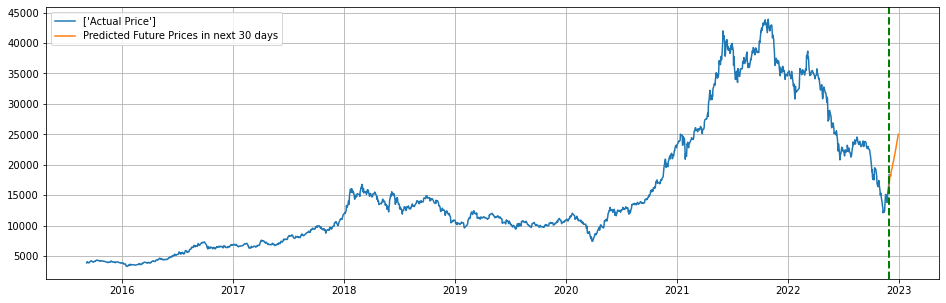

In [24]:
# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(df1['price'], label=['Actual Price'])
plt.plot(PREDICTIONS_FUTURE, label='Predicted Future Prices in next 30 days')

# Add a vertical line at the start of the future predictions
plt.axvline(x=min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

# Add a legend and grid
plt.legend()
plt.grid()

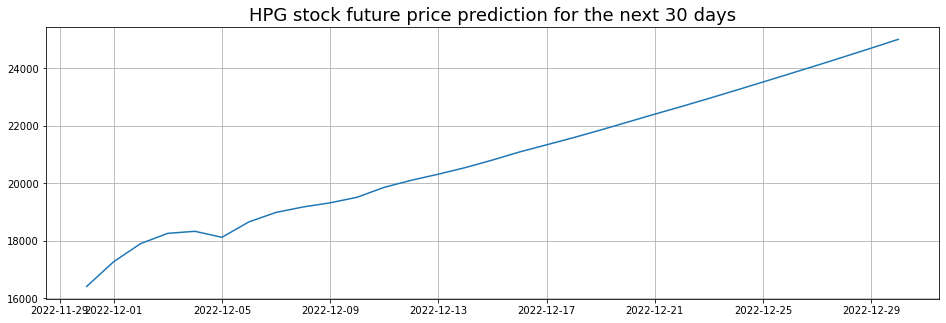

In [25]:
# Set the figure size and create a subplot
plt.figure(figsize=(16,5))
plt.plot(PREDICTIONS_FUTURE)
# Add a legend and grid
plt.title('HPG stock future price prediction for the next 30 days',fontsize=18)
plt.grid()

In [26]:
print(PREDICTIONS_FUTURE)

                   price
2022-11-30  16417.404406
2022-12-01  17278.805603
2022-12-02  17910.367473
2022-12-03  18264.664773
2022-12-04  18335.958783
2022-12-05  18126.548138
2022-12-06  18664.629748
2022-12-07  18992.740277
2022-12-08  19182.472715
2022-12-09  19326.220341
2022-12-10  19520.465319
2022-12-11  19866.313712
2022-12-12  20110.784901
2022-12-13  20323.586003
2022-12-14  20552.565915
2022-12-15  20815.123576
2022-12-16  21096.150209
2022-12-17  21344.583185
2022-12-18  21595.296640
2022-12-19  21860.379289
2022-12-20  22135.753144
2022-12-21  22411.199625
2022-12-22  22681.293517
2022-12-23  22958.168323
2022-12-24  23242.346956
2022-12-25  23530.176291
2022-12-26  23819.293540
2022-12-27  24110.797786
2022-12-28  24407.717564
2022-12-29  24709.011892
2022-12-30  25013.421904
